<a href="https://colab.research.google.com/github/AbrarKarim01/COMP-5011-ML_NN/blob/main/LR_Karim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
import pandas as pd # Import Panda
from google.colab import drive # import drive
drive.mount('/content/gdrive') # mount drive
data = pd.read_csv('/content/gdrive/MyDrive/COMP-5011/Assignment/Housing.csv') # assign path to an object
print(data.head()) # print the first few rows of the dataset

Mounted at /content/gdrive
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print(data.info()) # Basic information about the datasetusing info()funtion
print(data.describe()) # Statistical summary of the data set using describe()funtion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [ ]:
missing_values = data.isnull().sum() # Check for missing values with isnull() function and adding all of the missing values with sum() funtion
print(missing_values[missing_values > 0]) # Print the columns with missing values

for column in ['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms', 'price']:
  data.dropna(subset=[column], inplace=True) # Drop the missing values with dropna() function where subset=[column] checks for missing values in columns

Series([], dtype: int64)


In [ ]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder

# convert yes/no to 0/1 for categorical feautres
lable_encoder = LabelEncoder() # create a LabelEncoder object
data['hotwaterheating'] = lable_encoder.fit_transform(data['hotwaterheating']) # Apply label encoding
data['airconditioning'] = lable_encoder.fit_transform(data['airconditioning'])

from sklearn.preprocessing import MinMaxScaler # imports

scaler = MinMaxScaler() # creates a MinMaxScaler() object

numerical_columns = ['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms', 'price'] # selects only numerical columns for scaling
data[numerical_columns] = scaler.fit_transform(data[numerical_columns]) # applies Min-Max scaling
print(data.head()) # prints the first few rows of the scaled data

      price      area  bedrooms  bathrooms  stories mainroad guestroom  \
0  1.000000  0.396564       0.6   0.333333        3      yes        no   
1  0.909091  0.502405       0.6   1.000000        4      yes        no   
2  0.909091  0.571134       0.4   0.333333        2      yes        no   
3  0.906061  0.402062       0.6   0.333333        2      yes        no   
4  0.836364  0.396564       0.6   0.000000        2      yes       yes   

  basement  hotwaterheating  airconditioning  parking prefarea  \
0       no              0.0              1.0        2      yes   
1       no              0.0              1.0        3       no   
2      yes              0.0              0.0        2      yes   
3      yes              0.0              1.0        3      yes   
4      yes              0.0              1.0        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


Exploratory Data Analysis

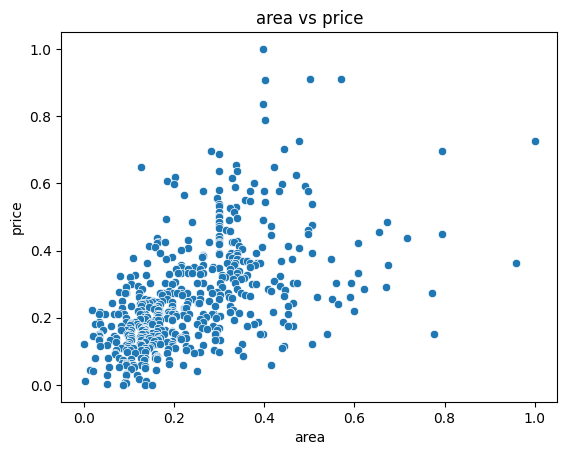

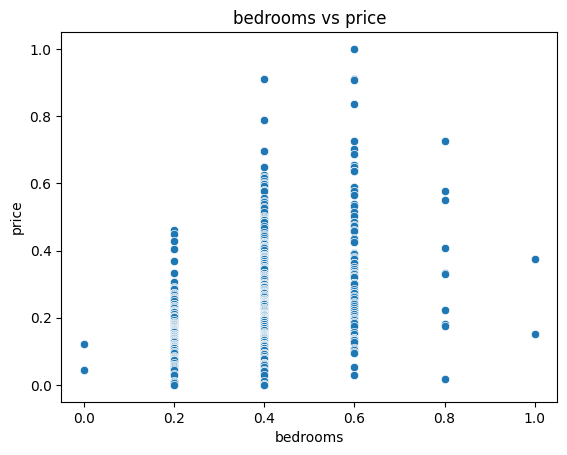

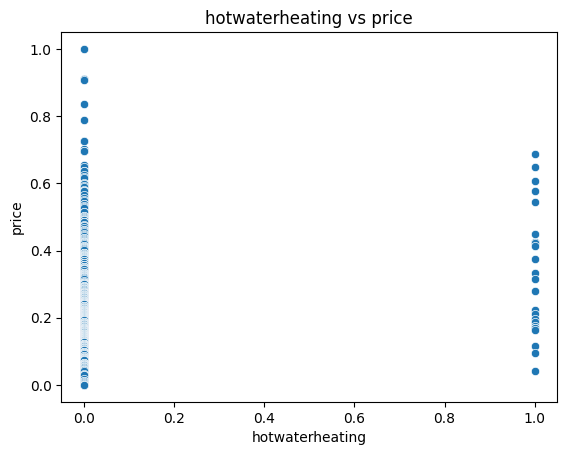

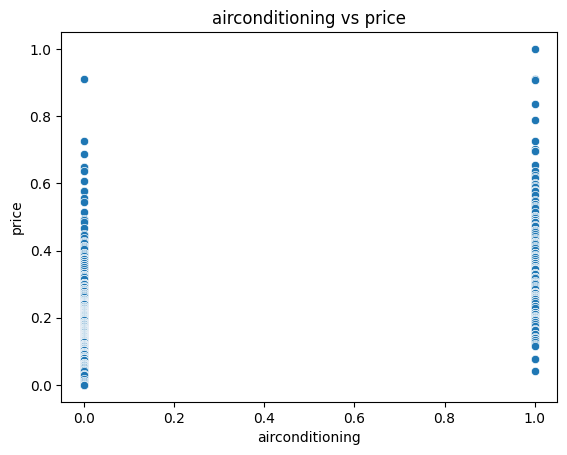

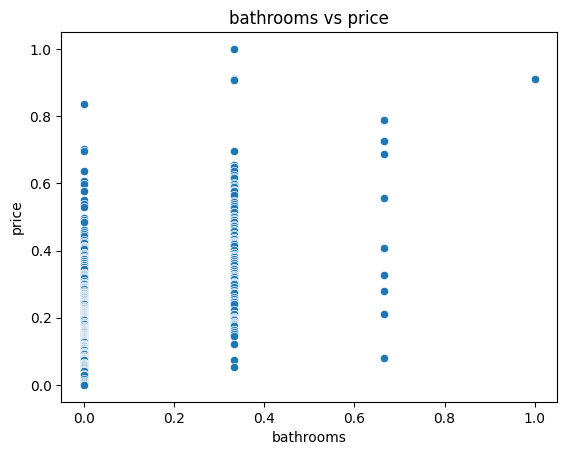

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots to show relationships
features = ['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms']
for feature in features:
  sns.scatterplot(x= feature, y='price', data=data)
  plt.title(f'{feature} vs price')
  plt.show()

Implement Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split # import the library to splitting the train and test

X = data[['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms']] # assign the features to X
y = data['price'] # assign the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # split the data into training and testing sets
print(X.shape, X_train.shape, X_test.shape)

(545, 5) (436, 5) (109, 5)


In [ ]:
import numpy as np

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # Add a bias term to the features

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train) # Initialize the weights randomly

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test] # Add a bias term to the test features
y_pred = X_test_b.dot(theta) # Make predictions on the test set

Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)# Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)# Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)# R² Score

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.011865459120406983
Mean Absolute Error (MAE): 0.08375491040436825
R² Score: 0.5540015962048443


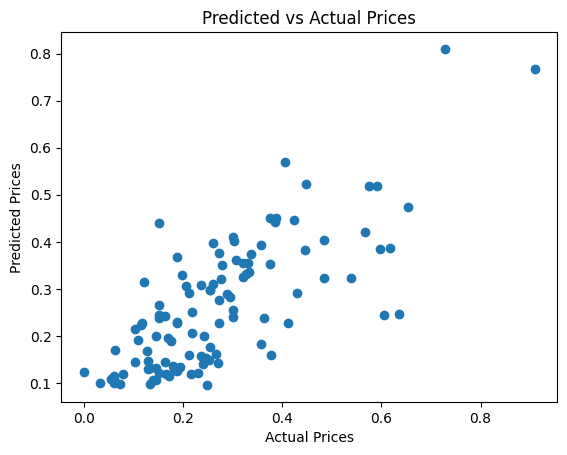

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()